Principal referência: projeto baseado em https://keras.io/examples/generative/vae/

1. Importing Libraries

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [3]:
# Delete all previous models to free memory
tf.keras.backend.clear_session()

Parameters

In [4]:
num_channels = 1

Create a sampling layer

In [5]:
class Sampling(layers.Layer):
  """Uses (z_mean, z_log_var) to sample z, the vector encoding an image."""

  def call(self, inputs):
    z_mean, z_log_var = inputs
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

## **Encoders**

In [5]:
#ENCODER
latent_dim = 2

encoder_inputs = keras.Input(shape=(28, 28, num_channels))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)

conv_shape = K.int_shape(x)  #shape of conv to be provided to decoder

x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 14, 14, 32)   320         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 7, 7, 64)     18496       ['conv2d[0][0]']                 
                                                                                                  
 flatten (Flatten)              (None, 3136)         0           ['conv2d_1[0][0]']               
                                                                                            

In [6]:
#ENCODER 2
latent_dim2 = 5

encoder_inputs = keras.Input(shape=(28, 28, num_channels))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)

conv_shape2 = K.int_shape(x)  #shape of conv to be provided to decoder

x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim2, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim2, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder2 = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder2")
encoder2.summary()

Model: "encoder2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_2 (Conv2D)              (None, 14, 14, 32)   320         ['input_2[0][0]']                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 7, 7, 64)     18496       ['conv2d_2[0][0]']               
                                                                                                  
 flatten_1 (Flatten)            (None, 3136)         0           ['conv2d_3[0][0]']               
                                                                                           

In [7]:
#ENCODER 3 (just 1 dense layer with 10 neurons)
latent_dim3=5
input_dim=28*28
encoder_inputs = keras.Input(shape=input_dim)
x = layers.Dense(10, activation="sigmoid")(encoder_inputs)
z_mean = layers.Dense(latent_dim3, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim3, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder3 = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder3")
encoder3.summary()

Model: "encoder3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 dense_2 (Dense)                (None, 10)           7850        ['input_3[0][0]']                
                                                                                                  
 z_mean (Dense)                 (None, 5)            55          ['dense_2[0][0]']                
                                                                                                  
 z_log_var (Dense)              (None, 5)            55          ['dense_2[0][0]']                
                                                                                           

In [8]:
#ENCODER 4 (two dense layers)
latent_dim4=5
input_dim=28*28
encoder_inputs = keras.Input(shape=input_dim)
x = layers.Dense(30, activation="sigmoid")(encoder_inputs)
x = layers.Dense(10, activation="sigmoid")(x)
z_mean = layers.Dense(latent_dim4, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim4, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder4 = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder4")
encoder4.summary()

Model: "encoder4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 30)           23550       ['input_4[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 10)           310         ['dense_3[0][0]']                
                                                                                                  
 z_mean (Dense)                 (None, 5)            55          ['dense_4[0][0]']                
                                                                                           

In [9]:
#ENCODER 5 (three convolutional layers and latent dimension 8)
latent_dim5 = 8

encoder_inputs = keras.Input(shape=(28, 28, num_channels))
x = layers.Conv2D(32, 3, activation="relu", padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
x = layers.Conv2D(128, 3, activation="relu", padding="same")(x)

conv_shape5 = K.int_shape(x)  #shape of conv to be provided to decoder

x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim5, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim5, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder5 = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder5")
encoder5.summary()

Model: "encoder5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_4 (Conv2D)              (None, 28, 28, 32)   320         ['input_5[0][0]']                
                                                                                                  
 conv2d_5 (Conv2D)              (None, 28, 28, 64)   18496       ['conv2d_4[0][0]']               
                                                                                                  
 conv2d_6 (Conv2D)              (None, 28, 28, 128)  73856       ['conv2d_5[0][0]']               
                                                                                           

In [6]:
#ENCODER 6 (two dense layers)
latent_dim6=2
input_dim=28*28
encoder_inputs = keras.Input(shape=input_dim)
x = layers.Dense(30, activation="sigmoid")(encoder_inputs)
x = layers.Dense(10, activation="sigmoid")(x)
z_mean = layers.Dense(latent_dim6, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim6, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder6 = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder6")
encoder6.summary()

Model: "encoder6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           23550       ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 10)           310         ['dense[0][0]']                  
                                                                                                  
 z_mean (Dense)                 (None, 2)            22          ['dense_1[0][0]']                
                                                                                           

## **DECODERS**

In [10]:
#DECODER
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(conv_shape[1] * conv_shape[2] * conv_shape[3], activation="relu")(latent_inputs)
x = layers.Reshape((conv_shape[1], conv_shape[2], conv_shape[3]))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(num_channels, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_6 (Dense)             (None, 3136)              9408      
                                                                 
 reshape (Reshape)           (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 64)       36928     
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 32)       18464     
 ranspose)                                                       
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 28, 28, 1)        289 

In [11]:
#DECODER 2

latent_inputs2 = keras.Input(shape=(latent_dim2,))
x = layers.Dense(conv_shape2[1] * conv_shape2[2] * conv_shape2[3], activation="relu")(latent_inputs2)
x = layers.Reshape((conv_shape2[1], conv_shape2[2], conv_shape2[3]))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(num_channels, 3, activation="sigmoid", padding="same")(x)
decoder2 = keras.Model(latent_inputs2, decoder_outputs, name="decoder2")
decoder2.summary()

Model: "decoder2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 5)]               0         
                                                                 
 dense_7 (Dense)             (None, 3136)              18816     
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 14, 14, 64)       36928     
 ranspose)                                                       
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 28, 28, 32)       18464     
 ranspose)                                                       
                                                                 
 conv2d_transpose_5 (Conv2DT  (None, 28, 28, 1)        289

In [12]:
#DECODER 3
latent_inputs3 = keras.Input(shape=(latent_dim3,))
x = layers.Dense(10, activation="sigmoid")(latent_inputs3)
decoder_outputs = layers.Dense(input_dim,activation = 'sigmoid')(x)
decoder3 = keras.Model(latent_inputs3, decoder_outputs, name="decoder3")
decoder3.summary()

Model: "decoder3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 5)]               0         
                                                                 
 dense_8 (Dense)             (None, 10)                60        
                                                                 
 dense_9 (Dense)             (None, 784)               8624      
                                                                 
Total params: 8,684
Trainable params: 8,684
Non-trainable params: 0
_________________________________________________________________


In [13]:
#DECODER 4
latent_inputs4 = keras.Input(shape=(latent_dim4,))
x = layers.Dense(10, activation="sigmoid")(latent_inputs4)
x = layers.Dense(30, activation="sigmoid")(x)
decoder_outputs = layers.Dense(input_dim,activation = 'sigmoid')(x)
decoder4 = keras.Model(latent_inputs4, decoder_outputs, name="decoder4")
decoder4.summary()

Model: "decoder4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 5)]               0         
                                                                 
 dense_10 (Dense)            (None, 10)                60        
                                                                 
 dense_11 (Dense)            (None, 30)                330       
                                                                 
 dense_12 (Dense)            (None, 784)               24304     
                                                                 
Total params: 24,694
Trainable params: 24,694
Non-trainable params: 0
_________________________________________________________________


In [14]:
#DECODER 5

latent_inputs5 = keras.Input(shape=(latent_dim5,))
x = layers.Dense(conv_shape5[1] * conv_shape5[2] * conv_shape5[3], activation="relu")(latent_inputs5)
x = layers.Reshape((conv_shape5[1], conv_shape5[2], conv_shape5[3]))(x)
x = layers.Conv2DTranspose(128, 3, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(num_channels, 3, activation="sigmoid", padding="same")(x)
decoder5 = keras.Model(latent_inputs5, decoder_outputs, name="decoder5")
decoder5.summary()

Model: "decoder5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 8)]               0         
                                                                 
 dense_13 (Dense)            (None, 100352)            903168    
                                                                 
 reshape_2 (Reshape)         (None, 28, 28, 128)       0         
                                                                 
 conv2d_transpose_6 (Conv2DT  (None, 28, 28, 128)      147584    
 ranspose)                                                       
                                                                 
 conv2d_transpose_7 (Conv2DT  (None, 28, 28, 64)       73792     
 ranspose)                                                       
                                                                 
 conv2d_transpose_8 (Conv2DT  (None, 28, 28, 32)       184

In [7]:
#DECODER 6
latent_inputs6 = keras.Input(shape=(latent_dim6,))
x = layers.Dense(10, activation="sigmoid")(latent_inputs6)
x = layers.Dense(30, activation="sigmoid")(x)
decoder_outputs = layers.Dense(input_dim,activation = 'sigmoid')(x)
decoder6 = keras.Model(latent_inputs6, decoder_outputs, name="decoder6")
decoder6.summary()

Model: "decoder6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_2 (Dense)             (None, 10)                30        
                                                                 
 dense_3 (Dense)             (None, 30)                330       
                                                                 
 dense_4 (Dense)             (None, 784)               24304     
                                                                 
Total params: 24,664
Trainable params: 24,664
Non-trainable params: 0
_________________________________________________________________


## **Define the VAE as a Model with a custom train_step**

adaptado de https://keras.io/examples/generative/vae/

In [8]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        x,y = data
        #Use gradientTape to record everything we need to compute the gradient
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(x)
            reconstruction = self.decoder(z)
            #Se a entrada for (,28,28,1)
            if(x.shape[1]==28):
              reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(x, reconstruction), axis=(1, 2)
                )
            )
            #Se a entrada for (,784)  
            if(x.shape[1]==784):
              reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(x, reconstruction), axis=None
                )
            )  
            #reconstruction_loss = input_dim*keras.losses.binary_crossentropy(x, reconstruction)    #input_dim=784
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        
        #Compute gradients
        grads = tape.gradient(total_loss, self.trainable_weights)
        #Apply gradients using the optimizer
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        
        #Update metrics
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }
    
    def test_step(self,data):
      x,y=data
      #Get the data
      z_mean, z_log_var, z = self.encoder(x,training=False)
      #Prediction
      reconstruction = self.decoder(z,training=False)
      #Loss
      #Se a entrada for (,28,28,1)
      if(x.shape[1]==28):
        reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(x, reconstruction), axis=(1, 2)
                )
            )
      #Se a entrada for (,784)
      if(x.shape[1]==784):
        reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(x, reconstruction), axis=None
                )
            )
      #reconstruction_loss = input_dim*keras.losses.binary_crossentropy(x, reconstruction)    #input_dim=784
      kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
      kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
      total_loss = reconstruction_loss + kl_loss

      #Update metrics
      self.total_loss_tracker.update_state(total_loss)
      self.reconstruction_loss_tracker.update_state(reconstruction_loss)
      self.kl_loss_tracker.update_state(kl_loss)
      return {
          "loss": self.total_loss_tracker.result(),
          "reconstruction_loss": self.reconstruction_loss_tracker.result(),
          "kl_loss": self.kl_loss_tracker.result(),
      }

## **Train the VAE**

In [9]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
mnist_digits = np.concatenate([x_train, x_test], axis=0)
#Podemos usar todas as entradas para treinamento pois esse é um treinamento autosupervisionado

11490434/11490434 [==============================] - 2s 0us/step


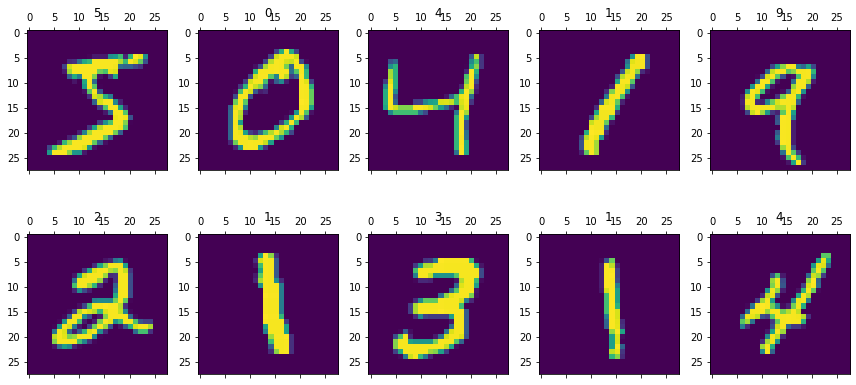

In [17]:
# Display images of the first 10 digits in the training set and their true lables
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n=0
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(x_train[n])
        axs[i,j].set(title=y_train[n])
        n=n+1
plt.show() 

In [10]:
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255
x_train = np.expand_dims(x_train, -1).astype("float32") / 255
x_val = np.expand_dims(x_test, -1).astype("float32") / 255

In [20]:
#VAE 1
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
history = vae.fit(x = x_train, y = x_train, validation_data=(x_val,x_val), epochs=30, batch_size=512)

Epoch 1/30
118/118 [==============================] - 5s 31ms/step - loss: 155.7093 - reconstruction_loss: 147.7469 - kl_loss: 6.4194 - val_loss: 154.1017 - val_reconstruction_loss: 147.6106 - val_kl_loss: 6.4911
Epoch 2/30
118/118 [==============================] - 3s 28ms/step - loss: 153.5453 - reconstruction_loss: 147.0118 - kl_loss: 6.4567 - val_loss: 153.8525 - val_reconstruction_loss: 147.4705 - val_kl_loss: 6.3820
Epoch 3/30
118/118 [==============================] - 3s 29ms/step - loss: 153.2820 - reconstruction_loss: 146.8325 - kl_loss: 6.4673 - val_loss: 153.7578 - val_reconstruction_loss: 147.3075 - val_kl_loss: 6.4503
Epoch 4/30
118/118 [==============================] - 3s 29ms/step - loss: 153.4654 - reconstruction_loss: 146.7776 - kl_loss: 6.4762 - val_loss: 153.7118 - val_reconstruction_loss: 147.2666 - val_kl_loss: 6.4452
Epoch 5/30
118/118 [==============================] - 4s 32ms/step - loss: 152.9658 - reconstruction_loss: 146.6549 - kl_loss: 6.4677 - val_loss: 15

In [21]:
#VAE 2
vae2 = VAE(encoder2, decoder2)
vae2.compile(optimizer=keras.optimizers.Adam())
history2 = vae2.fit(x = x_train, y = x_train, validation_data=(x_val,x_val), epochs=30, batch_size=512)

Epoch 1/30
118/118 [==============================] - 4s 31ms/step - loss: 362.1266 - reconstruction_loss: 268.6541 - kl_loss: 3.2997 - val_loss: 209.1410 - val_reconstruction_loss: 205.1906 - val_kl_loss: 3.9503
Epoch 2/30
118/118 [==============================] - 3s 28ms/step - loss: 206.1745 - reconstruction_loss: 199.6990 - kl_loss: 3.9703 - val_loss: 199.3359 - val_reconstruction_loss: 195.8690 - val_kl_loss: 3.4669
Epoch 3/30
118/118 [==============================] - 3s 28ms/step - loss: 197.9436 - reconstruction_loss: 191.4775 - kl_loss: 4.1762 - val_loss: 189.1579 - val_reconstruction_loss: 183.4536 - val_kl_loss: 5.7044
Epoch 4/30
118/118 [==============================] - 3s 29ms/step - loss: 187.1231 - reconstruction_loss: 178.6010 - kl_loss: 5.9964 - val_loss: 179.7636 - val_reconstruction_loss: 173.2427 - val_kl_loss: 6.5209
Epoch 5/30
118/118 [==============================] - 3s 29ms/step - loss: 178.0361 - reconstruction_loss: 169.4243 - kl_loss: 6.6759 - val_loss: 17

# Para testar os próximos modelos, temos que fazer um reshape pois eles não são convolucionais

In [12]:
# Reshape input data
x_train_reshaped = x_train.reshape(60000,784)
x_val_reshaped = x_val.reshape(10000,784)

# Print shapes
print("New shape of X_train: ",x_train_reshaped.shape)
print("New shape of X_test: ", x_val_reshaped.shape)

New shape of X_train:  (60000, 784)
New shape of X_test:  (10000, 784)


In [23]:
#VAE 3
vae3 = VAE(encoder3, decoder3)
vae3.compile(optimizer=keras.optimizers.Adam())
history3 = vae3.fit(x = x_train_reshaped, y = x_train_reshaped, validation_data=(x_val_reshaped,x_val_reshaped), epochs=30, batch_size=512)

Epoch 1/30
118/118 [==============================] - 1s 7ms/step - loss: 323.2267 - reconstruction_loss: 288.2206 - kl_loss: 1.4166 - val_loss: 224.0982 - val_reconstruction_loss: 220.4236 - val_kl_loss: 3.6747
Epoch 2/30
118/118 [==============================] - 1s 5ms/step - loss: 209.3529 - reconstruction_loss: 187.8111 - kl_loss: 5.4734 - val_loss: 168.1871 - val_reconstruction_loss: 162.3085 - val_kl_loss: 5.8786
Epoch 3/30
118/118 [==============================] - 1s 5ms/step - loss: 166.7856 - reconstruction_loss: 156.1943 - kl_loss: 5.4063 - val_loss: 152.2624 - val_reconstruction_loss: 147.3315 - val_kl_loss: 4.9310
Epoch 4/30
118/118 [==============================] - 1s 5ms/step - loss: 153.7579 - reconstruction_loss: 146.4229 - kl_loss: 4.5028 - val_loss: 145.3651 - val_reconstruction_loss: 141.2814 - val_kl_loss: 4.0837
Epoch 5/30
118/118 [==============================] - 1s 5ms/step - loss: 147.7236 - reconstruction_loss: 141.9947 - kl_loss: 3.7265 - val_loss: 141.550

In [24]:
#VAE 4
vae4 = VAE(encoder4, decoder4)
vae4.compile(optimizer=keras.optimizers.Adam())
history4 = vae4.fit(x = x_train_reshaped, y = x_train_reshaped, validation_data=(x_val_reshaped,x_val_reshaped), epochs=30, batch_size=512)

Epoch 1/30
118/118 [==============================] - 1s 7ms/step - loss: 283.7748 - reconstruction_loss: 230.4695 - kl_loss: 0.5320 - val_loss: 158.8523 - val_reconstruction_loss: 157.8449 - val_kl_loss: 1.0074
Epoch 2/30
118/118 [==============================] - 1s 6ms/step - loss: 154.1895 - reconstruction_loss: 147.0231 - kl_loss: 0.8126 - val_loss: 138.2630 - val_reconstruction_loss: 137.7008 - val_kl_loss: 0.5622
Epoch 3/30
118/118 [==============================] - 1s 5ms/step - loss: 140.2787 - reconstruction_loss: 137.8324 - kl_loss: 0.4670 - val_loss: 134.2665 - val_reconstruction_loss: 133.8889 - val_kl_loss: 0.3776
Epoch 4/30
118/118 [==============================] - 1s 6ms/step - loss: 137.2974 - reconstruction_loss: 135.3758 - kl_loss: 0.3752 - val_loss: 132.6794 - val_reconstruction_loss: 132.3169 - val_kl_loss: 0.3625
Epoch 5/30
118/118 [==============================] - 1s 6ms/step - loss: 135.7190 - reconstruction_loss: 134.1026 - kl_loss: 0.4306 - val_loss: 131.788

In [25]:
#VAE 5
vae5 = VAE(encoder5, decoder5)
vae5.compile(optimizer=keras.optimizers.Adam())
history5 = vae5.fit(x = x_train, y = x_train, validation_data=(x_val,x_val), epochs=30, batch_size=512)

Epoch 1/30
118/118 [==============================] - 28s 214ms/step - loss: 281.9598 - reconstruction_loss: 226.4230 - kl_loss: 1.7888 - val_loss: 200.4633 - val_reconstruction_loss: 197.6430 - val_kl_loss: 2.8203
Epoch 2/30
118/118 [==============================] - 24s 203ms/step - loss: 199.7526 - reconstruction_loss: 196.0762 - kl_loss: 3.0961 - val_loss: 197.5047 - val_reconstruction_loss: 194.3923 - val_kl_loss: 3.1123
Epoch 3/30
118/118 [==============================] - 23s 198ms/step - loss: 197.2518 - reconstruction_loss: 193.5201 - kl_loss: 3.4948 - val_loss: 196.4523 - val_reconstruction_loss: 191.9682 - val_kl_loss: 4.4842
Epoch 4/30
118/118 [==============================] - 23s 198ms/step - loss: 195.5243 - reconstruction_loss: 191.2372 - kl_loss: 3.7407 - val_loss: 193.1967 - val_reconstruction_loss: 189.5666 - val_kl_loss: 3.6301
Epoch 5/30
118/118 [==============================] - 25s 210ms/step - loss: 193.6751 - reconstruction_loss: 189.3215 - kl_loss: 3.7475 - va

In [13]:
#VAE 6
vae6 = VAE(encoder6, decoder6)
vae6.compile(optimizer=keras.optimizers.Adam())
history6 = vae6.fit(x = x_train_reshaped, y = x_train_reshaped, validation_data=(x_val_reshaped,x_val_reshaped), epochs=30, batch_size=512)

Epoch 1/30
118/118 [==============================] - 4s 9ms/step - loss: 286.3758 - reconstruction_loss: 232.8956 - kl_loss: 0.5359 - val_loss: 160.1562 - val_reconstruction_loss: 159.1952 - val_kl_loss: 0.9610
Epoch 2/30
118/118 [==============================] - 1s 6ms/step - loss: 155.0720 - reconstruction_loss: 147.7009 - kl_loss: 0.7560 - val_loss: 138.4484 - val_reconstruction_loss: 137.9240 - val_kl_loss: 0.5243
Epoch 3/30
118/118 [==============================] - 1s 6ms/step - loss: 140.3680 - reconstruction_loss: 137.8852 - kl_loss: 0.4525 - val_loss: 134.2034 - val_reconstruction_loss: 133.8286 - val_kl_loss: 0.3748
Epoch 4/30
118/118 [==============================] - 1s 6ms/step - loss: 137.1703 - reconstruction_loss: 135.2951 - kl_loss: 0.3971 - val_loss: 132.6589 - val_reconstruction_loss: 132.2845 - val_kl_loss: 0.3743
Epoch 5/30
118/118 [==============================] - 1s 6ms/step - loss: 135.6369 - reconstruction_loss: 134.0343 - kl_loss: 0.4530 - val_loss: 131.781

## **Plot the Loss Function**

dict_keys(['loss', 'reconstruction_loss', 'kl_loss', 'val_loss', 'val_reconstruction_loss', 'val_kl_loss'])


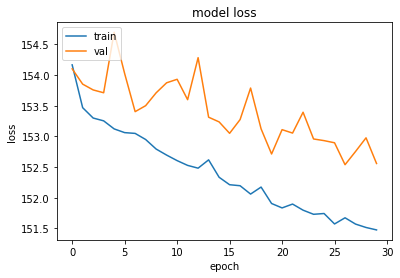

In [26]:
#VAE 1
# list all data in history
print(history.history.keys()) 
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

dict_keys(['loss', 'reconstruction_loss', 'kl_loss', 'val_loss', 'val_reconstruction_loss', 'val_kl_loss'])


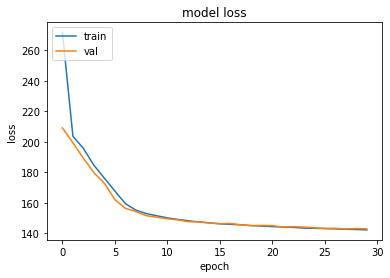

In [27]:
#VAE2
# list all data in history
print(history2.history.keys()) 
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

dict_keys(['loss', 'reconstruction_loss', 'kl_loss', 'val_loss', 'val_reconstruction_loss', 'val_kl_loss'])


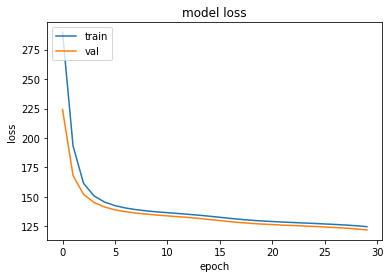

In [28]:
#VAE3
# list all data in history
print(history3.history.keys()) 
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

dict_keys(['loss', 'reconstruction_loss', 'kl_loss', 'val_loss', 'val_reconstruction_loss', 'val_kl_loss'])


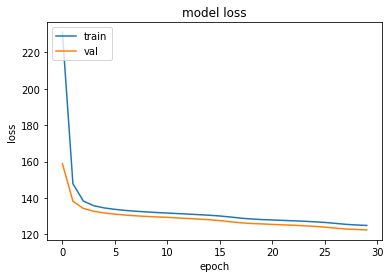

In [29]:
#VAE4
# list all data in history
print(history4.history.keys()) 
# summarize history for loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

dict_keys(['loss', 'reconstruction_loss', 'kl_loss', 'val_loss', 'val_reconstruction_loss', 'val_kl_loss'])


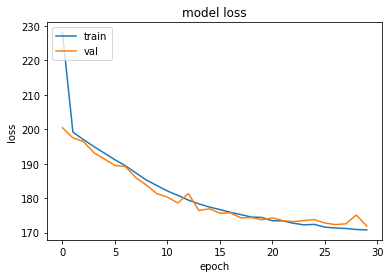

In [30]:
#VAE5
# list all data in history
print(history5.history.keys()) 
# summarize history for loss
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

dict_keys(['loss', 'reconstruction_loss', 'kl_loss', 'val_loss', 'val_reconstruction_loss', 'val_kl_loss'])


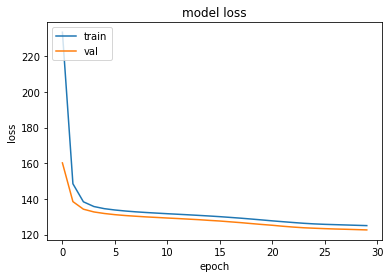

In [14]:
#VAE6
# list all data in history
print(history6.history.keys()) 
# summarize history for loss
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Gerar gráficos com a projeção do espaço latente em 2D (PCA)

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Projeção do Espaço Latente para Modelo 1

1875/1875 [==============================] - 3s 2ms/step


Text(0, 0.5, 'Second Principal Component')

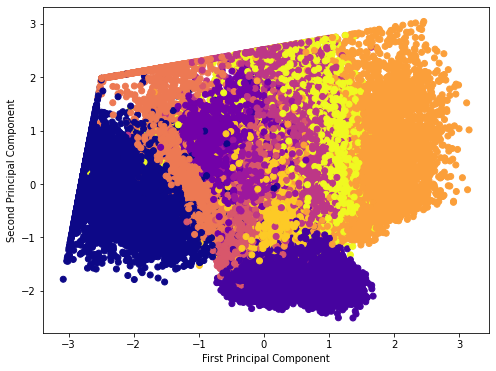

In [32]:
z_mean, _, _ = vae.encoder.predict(x_train)

scaler = StandardScaler()
scaler.fit(z_mean)
scaled_data = scaler.transform(z_mean)

pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_train,cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [33]:
#Variância explicada
total = pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]

print("Percentual da variância total explicada pelas duas componentes principais: {}%".format(total*100))

Percentual da variância total explicada pelas duas componentes principais: 100.0%


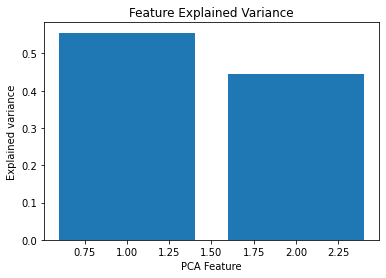

In [34]:
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_ratio_)+1),
    pca.explained_variance_ratio_
    )
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

In [35]:
z_mean, _, _ = vae2.encoder.predict(x_train)

1875/1875 [==============================] - 3s 2ms/step


## Projeção do Espaço Latente para Modelo 2

Text(0, 0.5, 'Second Principal Component')

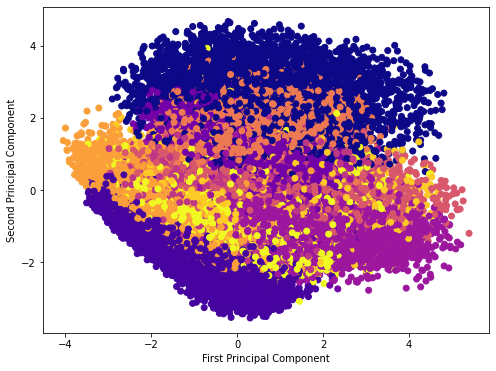

In [36]:
scaler = StandardScaler()
scaler.fit(z_mean)
scaled_data = scaler.transform(z_mean)

pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_train,cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [37]:
#Variância explicada
total = pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]

print("Percentual da variância total explicada pelas duas componentes principais: {}%".format(total*100))

Percentual da variância total explicada pelas duas componentes principais: 75.7302463054657%


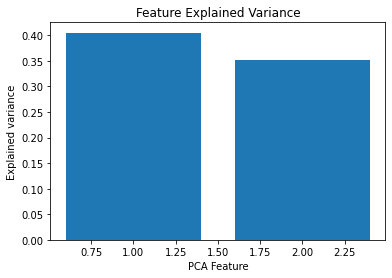

In [38]:
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_ratio_)+1),
    pca.explained_variance_ratio_
    )
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

In [39]:
z_mean, _, _ = vae3.encoder.predict(x_train_reshaped)

1875/1875 [==============================] - 3s 1ms/step


## Projeção do Espaço Latente para Modelo 3

Text(0, 0.5, 'Second Principal Component')

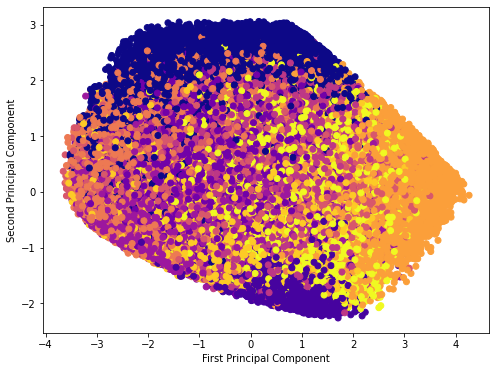

In [40]:
scaler = StandardScaler()
scaler.fit(z_mean)
scaled_data = scaler.transform(z_mean)

pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_train,cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [41]:
#Variância explicada
total = pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]

print("Percentual da variância total explicada pelas duas componentes principais: {}%".format(total*100))

Percentual da variância total explicada pelas duas componentes principais: 86.7102861404419%


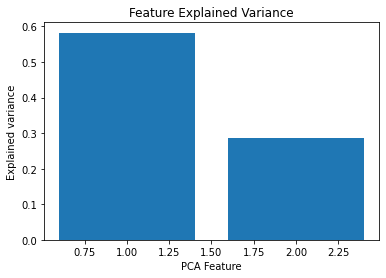

In [42]:
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_ratio_)+1),
    pca.explained_variance_ratio_
    )
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

In [43]:
z_mean, _, _ = vae4.encoder.predict(x_train_reshaped)

1875/1875 [==============================] - 3s 1ms/step


## Projeção do Espaço Latente para Modelo 4

Text(0, 0.5, 'Second Principal Component')

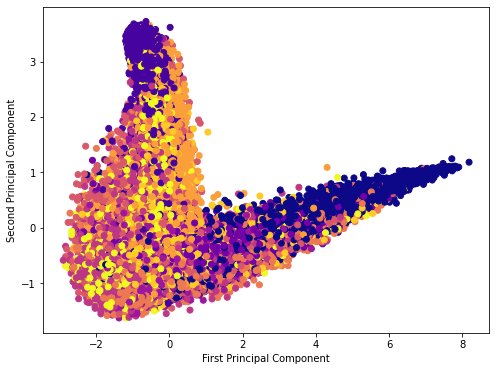

In [44]:
scaler = StandardScaler()
scaler.fit(z_mean)
scaled_data = scaler.transform(z_mean)

pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_train,cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [45]:
#Variância explicada
total = pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]

print("Percentual da variância total explicada pelas duas componentes principais: {}%".format(total*100))

Percentual da variância total explicada pelas duas componentes principais: 80.62909841537476%


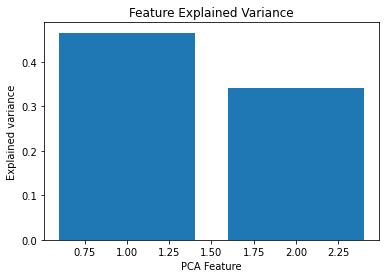

In [46]:
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_ratio_)+1),
    pca.explained_variance_ratio_
    )
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

In [51]:
z_mean, _, _ = vae5.encoder.predict(x_train)

1875/1875 [==============================] - 5s 3ms/step


## Projeção do Espaço Latente para Modelo 5

Text(0, 0.5, 'Second Principal Component')

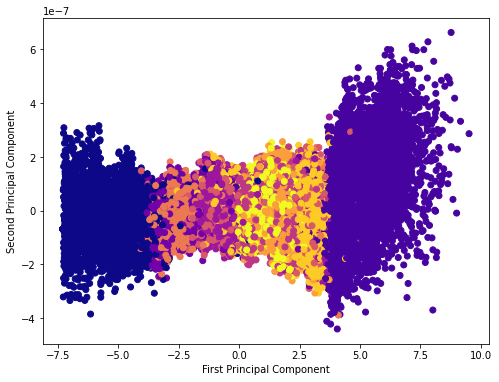

In [52]:
scaler = StandardScaler()
scaler.fit(z_mean)
scaled_data = scaler.transform(z_mean)

pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_train,cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [53]:
#Variância explicada
total = pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]

print("Percentual da variância total explicada pelas duas componentes principais: {}%".format(total*100))

Percentual da variância total explicada pelas duas componentes principais: 100.00021457672119%


In [55]:
pca.explained_variance_ratio_

array([1.0000021e+00, 8.6855928e-16], dtype=float32)

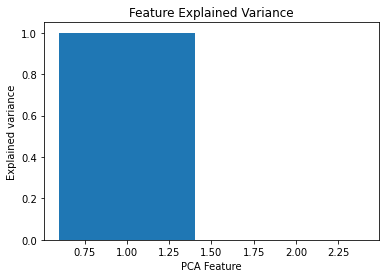

In [50]:
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_ratio_)+1),
    pca.explained_variance_ratio_
    )
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

In [25]:
z_mean, _, _ = vae6.encoder.predict(x_train_reshaped)

1875/1875 [==============================] - 3s 1ms/step


## Projeção do Espaço Latente para Modelo 6

Text(0, 0.5, 'Second Principal Component')

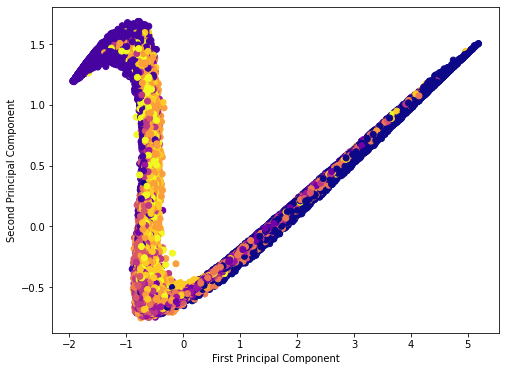

In [26]:
scaler = StandardScaler()
scaler.fit(z_mean)
scaled_data = scaler.transform(z_mean)

pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_train,cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [27]:
#Variância explicada
total = pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]

print("Percentual da variância total explicada pelas duas componentes principais: {}%".format(total*100))

Percentual da variância total explicada pelas duas componentes principais: 100.0%


In [28]:
pca.explained_variance_ratio_

array([0.74904096, 0.25095907], dtype=float32)

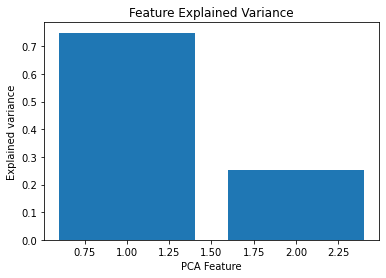

In [29]:
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_ratio_)+1),
    pca.explained_variance_ratio_
    )
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

# **Considerações**

No primeiro modelo, vemos que a variância explicada pelas duas componentes principais é de 100% porque originalmente o o espaço latente tinha apenas 2 dimensões realmente.

Nos gráficos de projeção das duas componentes principais, vemos que, apesar de o segundo modelo ter uma perda de validação menor do que o primeiro modelo, na projeção o primeiro modelo apresenta uma melhor separação de rótulos. Isso se dá pois o modelo 1 tem apenas 2 dimensões no espaço latente, enquanto o modelo 2 tem 5 dimensões. Então, apesar de o modelo 2 ter uma melhor separação, ele não é capaz de demonstrar isso usando apenas suas 2 componente principais (que expicam apenas 75% da sua variância), enquanto as duas componentes principais do modelo 1 explicam 100% da sua variância.

Além disso, é possível notar que no segundo modelo alcançou-se uma perda menor do que no primeiro. A diferença do primeiro para o segundo é simplesmente a dimensão do espaço latente. No segundo modelo, utilizamos um espaço latente de dimensão 5, o que fez com que conseguíssemos uma melhor representação das imagens.

Os modelos 2,3 e 4 apresentam 5 dimensões no espaço latente, mas visualmente o modelo 2 parece apresentar uma melhor separação entre os rótulos. Acreditamos que isso se deva ao uso das camadas convolucionais, que não estão presentes nos modelos 3 e 4.

Observando, por exemplo, a projeção do espaço latente para o modelo 1, observamos claramente que foi possível, em grande medida, fazer a separação de rótulos. Isso, de certa forma, ilustra a formação de clusters no espaço latente, pois, apesar de classes não serem o mesmo que clusters, o fato de elementos de mesma classe ficarem próximos no espaço latente mostra que estão sendo formados clusters.

Dentre os modelos com camadas convolucionais, o que alcançou menor perda de validação foi o modelo 2. Nesse modelo, a variância total explicada pelas duas componentes principais foi de aproximadamente 75%.

Dentre os modelos sem camadas convolucionais, aquele que alcançou menor perda no conjunto de validação foi o modelo 4 (pois ele é igual ao modelo 3, mas com uma camada a mais de 30 neurônios no encoder e no decoder). Entretanto, olhando para a projeção do espaço latente, não parece ter havido uma separação tão adequada dos rótulos. A variância total explicada pelas duas componentes principais foi de aproximadamente 80%.

Na verdade, observando o modelo 6, nota-se que ele teve uma perda de validação praticamente idêntica a do modelo 4. Esses dois modelos são idênticos, mudando apenas a dimensão do espaço latente.

O modelo 6 é igual ao modelo 4, com a única diferença de ter apenas 2 dimensões no espaço latente (o que fez com que a variância total explicada das duas dimensõe fosse exatamente 100%). A figura gerada na projeção em 2D para o modelo 6 foi bastante interessante e eu gostaria de enteder a razão para ela ter esse formato.

Obs.: a perda de validação dos modelos convolucionais foi maior do que a dos modelos não convolucionais, mas acreditamos que isso se deva a algum tipo de escala ou diferença de cálculo, pois os modelos convolucionais tiveram melhor performance.

# **References:**

Leitura bastante esclarecedora: https://towardsdatascience.com/understanding-variational-autoencoders-vaes-f70510919f73

* https://meritocracy.is/blog/2020/06/24/object-classification-in-tensorflow/
* https://www.assemblyai.com/blog/introduction-to-variational-autoencoders-using-keras/
* https://towardsdatascience.com/distributed-learning-on-image-classification-of-beans-in-tensorflow-5a85e6c3eb71
* https://www.deeplearningbook.com.br/variational-autoencoders-vaes-definicao-reducao-de-dimensionalidade-espaco-latente-e-regularizacao/
* https://github.com/AI-Lab-Makerere/ibean/
* https://www.youtube.com/watch?v=fcvYpzHmhvA (Ótimo video)
* https://www.youtube.com/watch?v=9zKuYvjFFS8

All the first part of this project is based on:
* https://keras.io/examples/generative/vae/
* https://blog.keras.io/building-autoencoders-in-keras.html
* https://julien-vitay.net/lecturenotes-neurocomputing/5-exercises/12-VAE.html (very important to plot validation loss)
* https://github.com/bnsreenu/python_for_microscopists/blob/master/178_179_variational_autoencoders_mnist.py
* https://www.youtube.com/watch?v=8wrLjnQ7EWQ (important to get conv_shape)
* https://towardsdatascience.com/vae-variational-autoencoders-how-to-employ-neural-networks-to-generate-new-images-bdeb216ed2c0 (to show the images and also a very good tutorial in general - I could follow this tutorial WITH DENSE LAYERS)
* https://towardsdatascience.com/how-number-of-hidden-layers-affects-the-quality-of-autoencoder-latent-representation-181215c8e7d1 (SIMPLEST POSSIBLE TUTORIAL WITH DENSE LAYERS)

PCA:
* https://leandrocruvinel.medium.com/pca-na-m%C3%A3o-e-no-python-d559e9c8f053
* https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
* https://www.jcchouinard.com/pca-with-python/#Plot_the_explained_variance


FIX BUGS:
* https://julien-vitay.net/lecturenotes-neurocomputing/5-exercises/12-VAE.html
* https://fixexception.com/tensorflow/when-subclassing-the-model-class-you-should-implement-a-call-method/
* https://github.com/bnsreenu/python_for_microscopists/blob/master/178_179_variational_autoencoders_mnist.py
* #https://stackoverflow.com/questions/50063613/what-is-the-purpose-of-the-add-loss-function-in-keras
* https://www.tensorflow.org/guide/keras/customizing_what_happens_in_fit
* https://stackoverflow.com/questions/71164291/how-to-implement-validation-loss-in-custom-training-loop